<h1><center>Forecasting BTC's Price</center></h1>

<h2>What is Bitcoin?</h2>

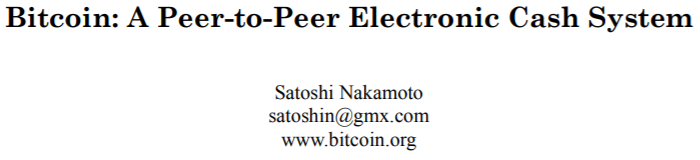

Launched in 2009 by the anonymous Satoshi Nakamoto, Bitcoin is described as a "peer to peer electronic cash system" in the bitcoin white paper. There are two primary components to Bitcoin; Bitcoin the token (abbreviated as BTC), and Bitcoin the protocol. Bitcoin the token is a snippet of code that represents ownership, while Bitcoin the protocol is a decentralized distributed network that maintains a ledger of balances (known as a Blockchain). 

<h2>The Problem</h2>

Bitcoins are mined by "miners" (specialized nodes), whose goal is to secure the Bitcoin network and process every Bitcoin Transaction. Miners achieve this by solving a computational problem put out by the Bitcoin network, which allows them to chain together a block of transactions. For successfully performing this action, miners are rewarded with newly-created Bitcoins and transactions fees. 

However, Bitcoin is a deflationary currency, and only 21 million bitcoins will ever be created. The amount of Bitcoins that are mined each block is cut in half every 4 years. From 2008 - 2012, 50 bitcoins were released each block. From 2012 - 2016, 25 bitcoins were released from each block. From 2016 - 2020, 12.5 bitcoins were mined each block. 

Historically, the price of Bitcoin has risen following a halving. Bitcoin reached a then peak of 1,134 USD on December 4th, 2013 following the halving on November 28, 2012, and reached it's all time high of 19,783 USD on December 17, 2017, following it's halving on July 6th, 2016. 

For my captone Submission, we will attempt to accurately forecast Bitcoin's price following it's next Halving on May 20, 2020. I will utilize s Facebook's Prophet Library for forecasting.  

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

The data we are going to use is from the website <b>coinmetrics.io</b>, a crypto financial data provider to instituitions. Some basic EDA is required to make sure the data set is properly cleaned.

In [2]:
bitcoin = pd.read_csv('btc.csv')
bitcoin.dtypes

Date                          object
Active Address Count           int64
Block Count                    int64
Block Size Bytes               int64
MVRV Ration                  float64
Market Cap (USD)             float64
Realized Market Cap (USD)    float64
Mean Difficulty              float64
Mean Fee (USD)               float64
Total Fees                   float64
HashRate                     float64
Issuance BTC                 float64
Issuance USD                 float64
NVT Ratio                    float64
NVTAdj90                     float64
PriceUSD                     float64
Supply Total                 float64
Transaction Count              int64
Volume USD                   float64
dtype: object

In [3]:
bitcoin.set_index('Date', inplace=True)

In [4]:
bitcoin.head()

,Active Address Count,Block Count,Block Size Bytes,MVRV Ration,Market Cap (USD),Realized Market Cap (USD),Mean Difficulty,Mean Fee (USD),Total Fees,HashRate,Issuance BTC,Issuance USD,NVT Ratio,NVTAdj90,PriceUSD,Supply Total,Transaction Count,Volume USD
Date,,,,,,,,,,,,,,,,,,
11/28/2012,44590,172,17371057,1.741273,129500185.1,74370983.74,3438908.96,0.014378,543.376339,29.403244,7000.0,86321.61879,33.519213,33.293511,12.331660,10501439.94,37791,3863461.335
11/29/2012,41205,166,17037899,1.761921,131295308.6,74518282.44,3438908.96,0.009943,361.715787,28.377549,4150.0,51865.29586,44.055471,33.967980,12.497662,10505589.94,36379,2980227.101
11/30/2012,37930,125,13725195,1.770415,132264146.2,74707971.26,3438908.96,0.009597,294.323376,21.368636,3125.0,39331.68415,39.622547,34.266008,12.586139,10508714.94,30667,3338103.041
12/1/2012,33858,167,15061838,1.769383,132382377.3,74818378.24,3438908.96,0.009969,323.225633,28.548498,4175.0,52573.21518,55.848283,34.302741,12.592387,10512889.94,32424,2370392.957
12/2/2012,28210,143,9516692,1.755010,131434197.9,74890835.37,3438908.96,0.009358,188.343867,24.445720,3575.0,44680.15250,54.584586,34.089890,12.497945,10516464.94,20126,2407899.528


In [5]:
bitcoin.describe()

,Active Address Count,Block Count,Block Size Bytes,MVRV Ration,Market Cap (USD),Realized Market Cap (USD),Mean Difficulty,Mean Fee (USD),Total Fees,HashRate,Issuance BTC,Issuance USD,NVT Ratio,NVTAdj90,PriceUSD,Supply Total,Transaction Count,Volume USD
count,2.656000e+03,2656.000000,2.656000e+03,2656.000000,2.656000e+03,2.656000e+03,2.656000e+03,2656.000000,2.656000e+03,2.656000e+03,2656.000000,2.656000e+03,2656.000000,2656.000000,2656.000000,2.656000e+03,2656.000000,2.656000e+03
mean,4.613898e+05,154.615587,9.874009e+07,1.769933,5.187308e+10,3.204131e+10,2.443948e+12,1.311470,3.867155e+05,1.802540e+07,2922.548005,6.086811e+06,58.428646,57.182748,3031.506722,1.511556e+07,188400.094503,9.047786e+08
std,2.726101e+05,19.211329,5.257198e+07,0.790393,6.636144e+10,3.934520e+10,3.973683e+12,4.298531,1.420901e+06,2.933385e+07,1127.438057,7.123589e+06,28.354610,19.542637,3788.355302,2.249318e+06,105949.101588,1.277392e+09
min,2.821000e+04,80.000000,9.516692e+06,0.563580,1.295002e+08,7.437098e+07,2.968775e+06,0.009358,1.883439e+02,1.775846e+01,1000.000000,3.596057e+04,9.352194,22.117424,12.331660,1.050144e+07,20126.000000,2.370393e+06
25%,1.965832e+05,142.000000,4.358378e+07,1.257286,4.387495e+09,4.135012e+09,2.982973e+10,0.075382,5.927576e+03,2.342894e+05,1875.000000,1.090617e+06,36.646509,41.809876,323.027362,1.330535e+07,75736.000000,7.126441e+07
50%,4.971995e+05,153.000000,1.107659e+08,1.637168,9.971832e+09,5.747081e+09,2.100000e+11,0.187761,3.714108e+04,1.520148e+06,2362.500000,2.161525e+06,52.660854,52.763468,669.238444,1.576584e+07,199609.500000,2.510073e+08
75%,6.820040e+05,165.000000,1.429903e+08,2.138633,1.070000e+11,7.978303e+10,4.140000e+12,0.843151,2.216847e+05,3.092096e+07,3900.000000,1.096501e+07,73.114500,70.367107,6226.569146,1.703072e+07,278540.250000,1.495168e+09
max,1.290363e+06,260.000000,2.186042e+08,5.884068,3.290000e+11,1.060000e+11,1.550000e+13,56.308124,2.139776e+07,1.362650e+08,7000.000000,4.451671e+07,184.888719,154.082818,19640.513880,1.825670e+07,498142.000000,1.082210e+10


In [6]:
bitcoin.columns

Index(['Active Address Count', 'Block Count', 'Block Size Bytes',
       'MVRV Ration', 'Market Cap (USD)', 'Realized Market Cap (USD)',
       'Mean Difficulty', 'Mean Fee (USD)', 'Total Fees', 'HashRate',
       'Issuance BTC', 'Issuance USD', 'NVT Ratio', 'NVTAdj90', 'PriceUSD',
       'Supply Total', 'Transaction Count', 'Volume USD'],
      dtype='object')

In [7]:
bitcoin.columns = ['ActiveAddresses', 'BlockCount', 'BlockSizeBytes', 'MVRVRatio', 'MarketCap', 'RealizedMarketCap', 'MeanDifficulty', 'MeanFee', 'TotalFees', 'HashRate', 'IssuanceBTC', 'IssuanceUSD', 'NVTRatio', 'NVTAdj90', 'PriceUSD', 'SupplyTotal', 'TransactionCount', 'Volume']

In [8]:
bitcoin.columns

Index(['ActiveAddresses', 'BlockCount', 'BlockSizeBytes', 'MVRVRatio',
       'MarketCap', 'RealizedMarketCap', 'MeanDifficulty', 'MeanFee',
       'TotalFees', 'HashRate', 'IssuanceBTC', 'IssuanceUSD', 'NVTRatio',
       'NVTAdj90', 'PriceUSD', 'SupplyTotal', 'TransactionCount', 'Volume'],
      dtype='object')

In [9]:
bitcoin.isnull().sum()

ActiveAddresses      0
BlockCount           0
BlockSizeBytes       0
MVRVRatio            0
MarketCap            0
RealizedMarketCap    0
MeanDifficulty       0
MeanFee              0
TotalFees            0
HashRate             0
IssuanceBTC          0
IssuanceUSD          0
NVTRatio             0
NVTAdj90             0
PriceUSD             0
SupplyTotal          0
TransactionCount     0
Volume               0
dtype: int64

<h2>Price Over Time</h2>

Below is a chart of BTC's price over time. We start at the time of Bitcoin's first halving on November 28, 2012.

Text(0, 0.5, 'BTC Price')

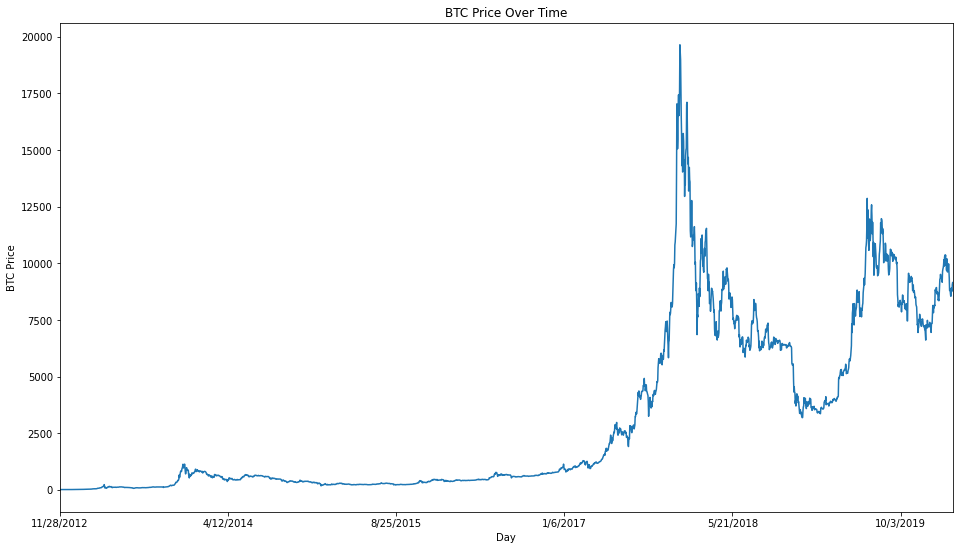

In [10]:
plt.rcParams["figure.figsize"] = [16,9]
ax = bitcoin.PriceUSD.plot(title = "BTC Price Over Time")
ax.set_xlabel("Day")
ax.set_ylabel("BTC Price")

<h2> Facebook Prophet</h2>

We will calculate the average length of days between a halving and peak in price. 

In [11]:
from datetime import datetime, timedelta

In [12]:
first_halving = datetime(2012,11,28,0,0,0)
first_peak = datetime(2013,12,4,0,0,0)
first_peak - first_halving
(first_peak - first_halving).days

371

371 Days between first halving and the first peak in price. 

In [13]:
second_halving = datetime(2016,7,6,0,0,0)
second_peak = datetime(2017,12,17,0,0,0)
second_peak - second_halving
(second_peak - second_halving).days

529

529 Days between the second halving and the second peak in price. 

In [14]:
(529+371)/2

450.0

<b> This gives us an average of 450 days between a halving and peak in price.</b>. Now we calculate the date 450 days out from May 20, 2020

In [15]:
third_halving = datetime(2020,5,20,0,0,0)
third_peak = timedelta(450)
third_peak+third_halving

datetime.datetime(2021, 8, 13, 0, 0)

Finally, we find the length of days between the date of this presentation, March 16, 2020, and August 13, 2021 (our projected peak).

In [16]:
presentation = datetime(2020,3,16,0,0,0)
third_peak=datetime(2021,8,13,0,0,0)
(third_peak - presentation).days

515

Therefore, we will forecast out 515 + 10 days, since our data ends on March 6, 2020, for a total of <b>525 Days</b>.

In [17]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

Importing plotly failed. Interactive plots will not work.


In [18]:
bitcoin_prophet = pd.read_csv('btc.csv')

In [19]:
bitcoin_prophet.head()

,Date,Active Address Count,Block Count,Block Size Bytes,MVRV Ration,Market Cap (USD),Realized Market Cap (USD),Mean Difficulty,Mean Fee (USD),Total Fees,HashRate,Issuance BTC,Issuance USD,NVT Ratio,NVTAdj90,PriceUSD,Supply Total,Transaction Count,Volume USD
0,11/28/2012,44590,172,17371057,1.741273,129500185.1,74370983.74,3438908.96,0.014378,543.376339,29.403244,7000.0,86321.61879,33.519213,33.293511,12.331660,10501439.94,37791,3863461.335
1,11/29/2012,41205,166,17037899,1.761921,131295308.6,74518282.44,3438908.96,0.009943,361.715787,28.377549,4150.0,51865.29586,44.055471,33.967980,12.497662,10505589.94,36379,2980227.101
2,11/30/2012,37930,125,13725195,1.770415,132264146.2,74707971.26,3438908.96,0.009597,294.323376,21.368636,3125.0,39331.68415,39.622547,34.266008,12.586139,10508714.94,30667,3338103.041
3,12/1/2012,33858,167,15061838,1.769383,132382377.3,74818378.24,3438908.96,0.009969,323.225633,28.548498,4175.0,52573.21518,55.848283,34.302741,12.592387,10512889.94,32424,2370392.957
4,12/2/2012,28210,143,9516692,1.755010,131434197.9,74890835.37,3438908.96,0.009358,188.343867,24.445720,3575.0,44680.15250,54.584586,34.089890,12.497945,10516464.94,20126,2407899.528


In [20]:
bitcoin_prophet.columns = ['Date','ActiveAddresses', 'BlockCount', 'BlockSizeBytes', 'MVRVRatio', 'MarketCap', 'RealizedMarketCap', 'MeanDifficulty', 'MeanFee', 'TotalFees', 'HashRate', 'IssuanceBTC', 'IssuanceUSD', 'NVTRatio','NVTAdj90', 'PriceUSD', 'SupplyTotal', 'TransactionCount', 'Volume']

In [21]:
bitcoin_prophet = bitcoin_prophet[[('Date'),('PriceUSD')]].loc[:]

In [22]:
bitcoin_prophet

,Date,PriceUSD
0,11/28/2012,12.331660
1,11/29/2012,12.497662
2,11/30/2012,12.586139
3,12/1/2012,12.592387
4,12/2/2012,12.497945
...,...,...
2651,3/2/2020,8906.214756
2652,3/3/2020,8768.810614
2653,3/4/2020,8756.369572
2654,3/5/2020,9062.615803


We switch the date to 'ds' and our PriceUSD variable to 'y'.

In [23]:
bitcoin_prophet.rename(columns={'Date': 'ds', 'PriceUSD': 'y'}, inplace = True)

In [24]:
bitcoin_prophet.head()

,ds,y
0,11/28/2012,12.331660
1,11/29/2012,12.497662
2,11/30/2012,12.586139
3,12/1/2012,12.592387
4,12/2/2012,12.497945


In [25]:
bitcoin_prophet.isnull().sum()

ds    0
y     0
dtype: int64

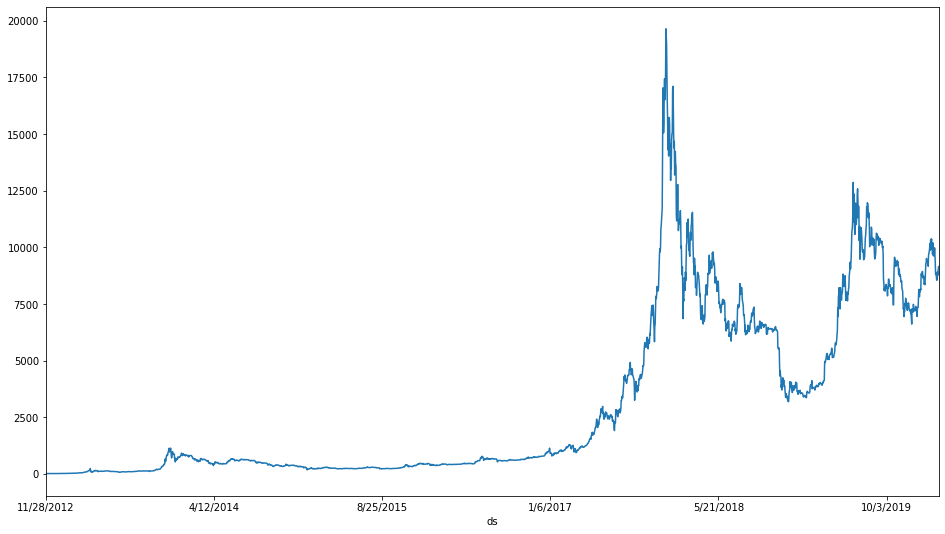

In [26]:
bitcoin_prophet.set_index('ds').y.plot()

In [27]:
bitcoin_prophet['y']=np.log(bitcoin_prophet['y'])

Convert our y values to log to help smooth out any anomalies. 

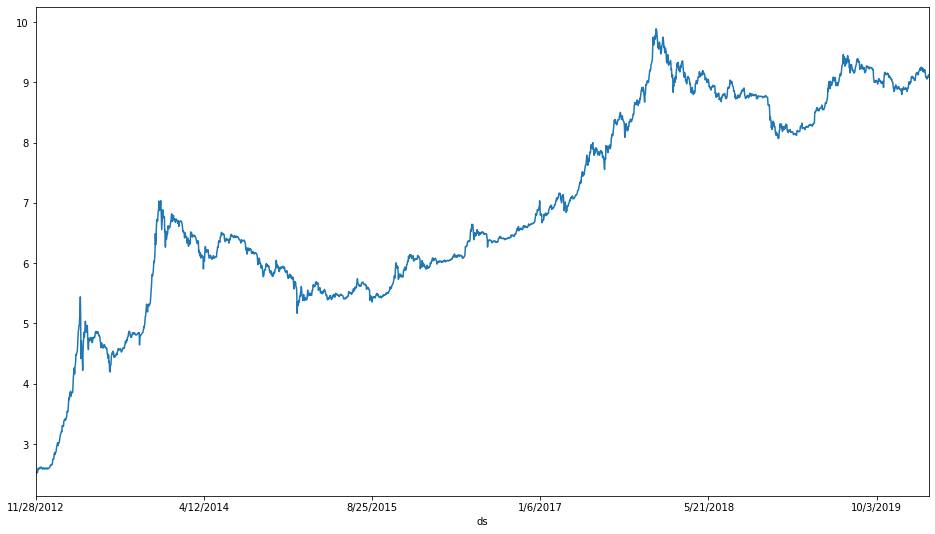

In [28]:
bitcoin_prophet.set_index('ds').y.plot()

In [29]:
model = Prophet(daily_seasonality=True, growth='linear')
model.fit(bitcoin_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [30]:
future = model.make_future_dataframe(periods=525, freq = 'd')
future.tail()

,ds
3176,2021-08-09
3177,2021-08-10
3178,2021-08-11
3179,2021-08-12
3180,2021-08-13


In [31]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3176,2021-08-09,10.286244,4.560402,16.550156,4.484993,16.397258,0.084132,0.084132,0.084132,-0.181515,...,0.001603,0.001603,0.001603,0.264043,0.264043,0.264043,0.0,0.0,0.0,10.370376
3177,2021-08-10,10.287847,4.545869,16.517670,4.473849,16.414060,0.082984,0.082984,0.082984,-0.181515,...,0.002938,0.002938,0.002938,0.261561,0.261561,0.261561,0.0,0.0,0.0,10.370832
3178,2021-08-11,10.289451,4.516291,16.554419,4.462963,16.430861,0.078102,0.078102,0.078102,-0.181515,...,0.000755,0.000755,0.000755,0.258861,0.258861,0.258861,0.0,0.0,0.0,10.367553
3179,2021-08-12,10.291054,4.453291,16.537004,4.452077,16.447663,0.073088,0.073088,0.073088,-0.181515,...,-0.001380,-0.001380,-0.001380,0.255983,0.255983,0.255983,0.0,0.0,0.0,10.364142
3180,2021-08-13,10.292657,4.441741,16.575875,4.441191,16.476872,0.070832,0.070832,0.070832,-0.181515,...,-0.000619,-0.000619,-0.000619,0.252966,0.252966,0.252966,0.0,0.0,0.0,10.363490


In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3176,2021-08-09,10.370376,4.560402,16.550156
3177,2021-08-10,10.370832,4.545869,16.517670
3178,2021-08-11,10.367553,4.516291,16.554419
3179,2021-08-12,10.364142,4.453291,16.537004
3180,2021-08-13,10.363490,4.441741,16.575875


After converting back to normal values, we see a forecasted price of 31,681 USD on August 13, 2021

In [33]:
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']])

,yhat,yhat_lower,yhat_upper
0,10.152844,8.185243,1.250902e+01
1,10.325152,8.368826,1.290715e+01
2,10.525617,8.500210,1.297519e+01
3,10.712328,8.639832,1.326119e+01
4,10.885503,8.728182,1.334712e+01
...,...,...,...
3176,31900.466465,95.621873,1.540428e+07
3177,31915.016593,94.242327,1.491190e+07
3178,31810.537424,91.495596,1.547009e+07
3179,31702.235678,85.909190,1.520301e+07


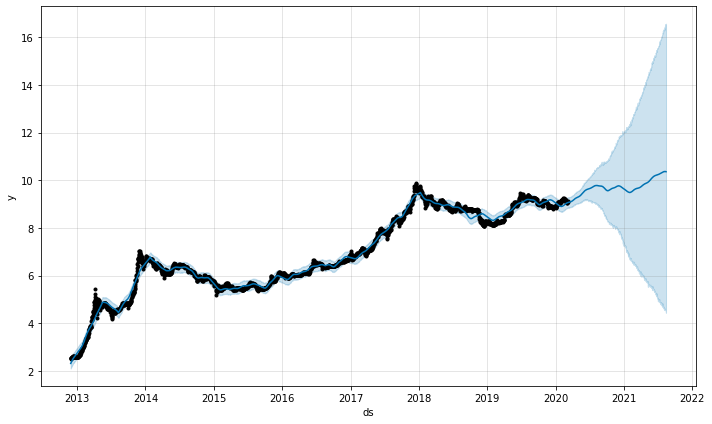

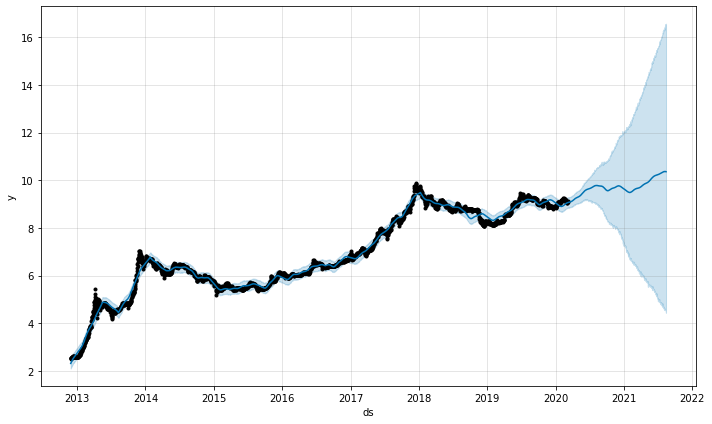

In [34]:
model.plot(forecast)

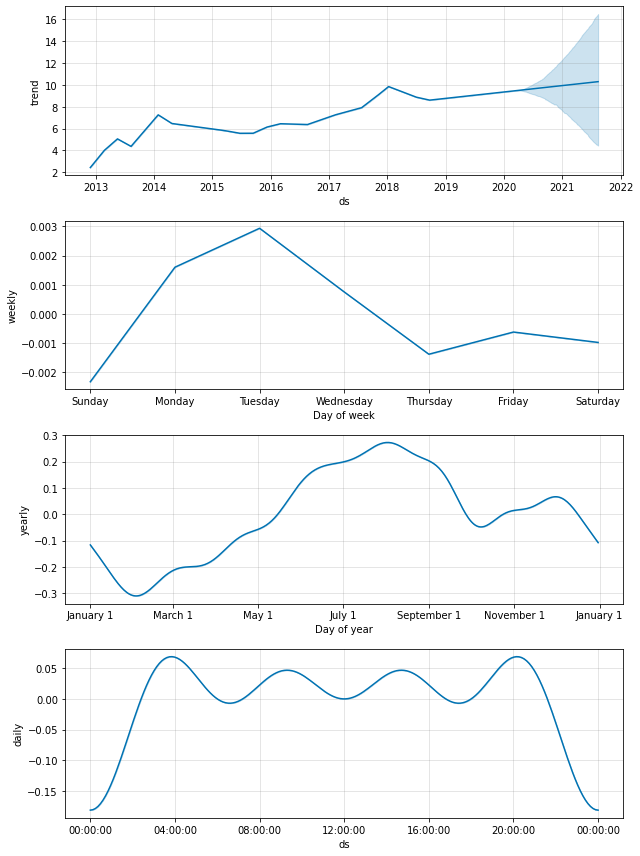

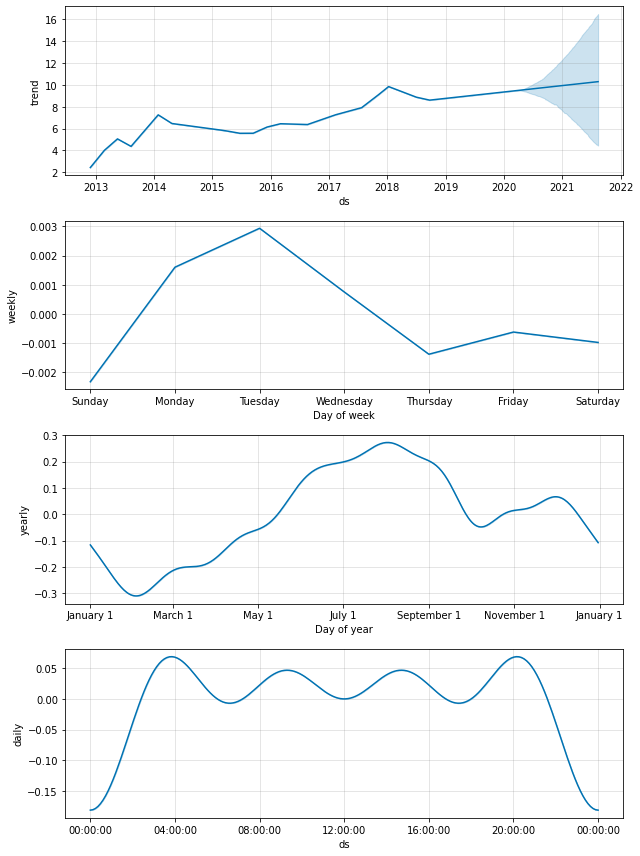

In [35]:
model.plot_components(forecast)

In [36]:
metric_df = forecast.set_index('ds')[['yhat']].join(bitcoin_prophet.set_index('ds').y).reset_index()

In [37]:
metric_df.tail()

,ds,yhat,y
3176,2021-08-09,10.370376,NaN
3177,2021-08-10,10.370832,NaN
3178,2021-08-11,10.367553,NaN
3179,2021-08-12,10.364142,NaN
3180,2021-08-13,10.363490,NaN


In [38]:
metric_df.dropna(inplace = True)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("R-squared: ", r2_score(metric_df.y, metric_df.yhat))
print("Mean Squared Error: ", mean_squared_error(metric_df.y, metric_df.yhat))
print("RMSE: ", np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat)))

R-squared:  0.9902680549348517
Mean Squared Error:  0.028056058753993224
RMSE:  0.1674994291154248


Our R-Squared is almost perfect, probably too perfect. Our mean squared error is also very low. 

<h2>Using Halvings and Peaks as "Holidays"</h2>

We will set the halving and price peak days as our holidays, and then open the window to 30 days before and after each one of these dates.

In [40]:
halvings_peaks = pd.DataFrame({
  'holiday': 'Halvings_Peaks',
  'ds': pd.to_datetime(['2012-11-28', '2013-12-04', '2016-07-06',
                        '2017-12-17']), 
  'lower_window': -30,
  'upper_window': 30,
})

In [41]:
halvings_peaks.tail()

,holiday,ds,lower_window,upper_window
0,Halvings_Peaks,2012-11-28,-30,30
1,Halvings_Peaks,2013-12-04,-30,30
2,Halvings_Peaks,2016-07-06,-30,30
3,Halvings_Peaks,2017-12-17,-30,30


In [42]:
bitcoin_prophet

,ds,y
0,11/28/2012,2.512170
1,11/29/2012,2.525542
2,11/30/2012,2.532596
3,12/1/2012,2.533092
4,12/2/2012,2.525564
...,...,...
2651,3/2/2020,9.094505
2652,3/3/2020,9.078956
2653,3/4/2020,9.077537
2654,3/5/2020,9.111913


In [43]:
model=Prophet(holidays=halvings_peaks, daily_seasonality=True)

In [44]:
model.fit(bitcoin_prophet)

In [45]:
future=model.make_future_dataframe(periods=525,freq='d')

In [46]:
future.tail()

,ds
3176,2021-08-09
3177,2021-08-10
3178,2021-08-11
3179,2021-08-12
3180,2021-08-13


In [47]:
forecast=model.predict(future)


In [48]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Halvings_Peaks,Halvings_Peaks_lower,Halvings_Peaks_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-11-28,2.386519,2.420184,2.808982,2.386519,2.386519,0.681379,0.681379,0.681379,0.230343,...,0.000958,0.000958,0.000958,-0.049199,-0.049199,-0.049199,0.0,0.0,0.0,2.616862
1,2012-11-29,2.408003,2.394422,2.780172,2.408003,2.408003,0.633791,0.633791,0.633791,0.174289,...,-0.002488,-0.002488,-0.002488,-0.054218,-0.054218,-0.054218,0.0,0.0,0.0,2.582292
2,2012-11-30,2.429487,2.343687,2.711945,2.429487,2.429487,0.560359,0.560359,0.560359,0.096911,...,-0.001530,-0.001530,-0.001530,-0.059123,-0.059123,-0.059123,0.0,0.0,0.0,2.526398
3,2012-12-01,2.450971,2.278382,2.656822,2.450971,2.450971,0.487129,0.487129,0.487129,0.020205,...,-0.000235,-0.000235,-0.000235,-0.063893,-0.063893,-0.063893,0.0,0.0,0.0,2.471176
4,2012-12-02,2.472455,2.306482,2.663795,2.472455,2.472455,0.489232,0.489232,0.489232,0.016684,...,-0.001241,-0.001241,-0.001241,-0.068512,-0.068512,-0.068512,0.0,0.0,0.0,2.489139


In [49]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3176,2021-08-09,10.400550,4.116822,17.059333
3177,2021-08-10,10.403214,4.015024,17.098079
3178,2021-08-11,10.401408,4.042310,17.057437
3179,2021-08-12,10.398229,4.107575,17.129664
3180,2021-08-13,10.399286,3.992503,17.130296


In [50]:
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']])

,yhat,yhat_lower,yhat_upper
0,13.692691,11.247934,1.659302e+01
1,13.227424,10.961859,1.612180e+01
2,12.508371,10.419578,1.505853e+01
3,11.836359,9.760878,1.425093e+01
4,12.050892,10.039045,1.435064e+01
...,...,...,...
3176,32877.689995,61.363889,2.563150e+07
3177,32965.396688,55.424612,2.664412e+07
3178,32905.911922,56.957780,2.558296e+07
3179,32801.486116,60.799100,2.749910e+07


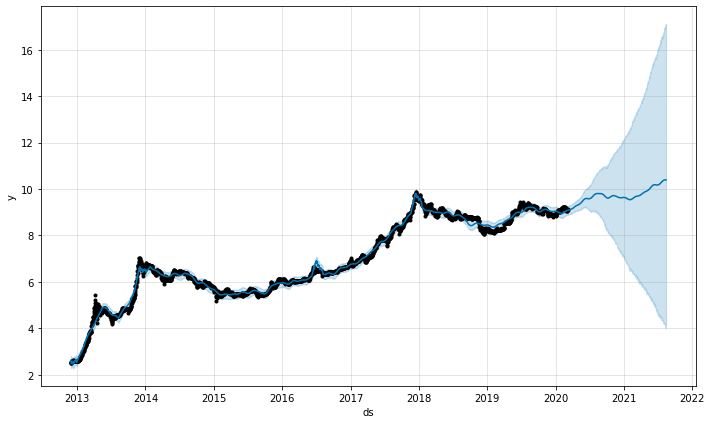

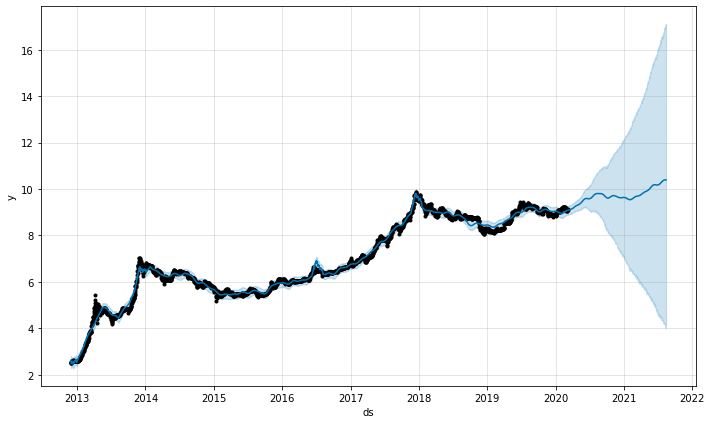

In [51]:
model.plot(forecast)

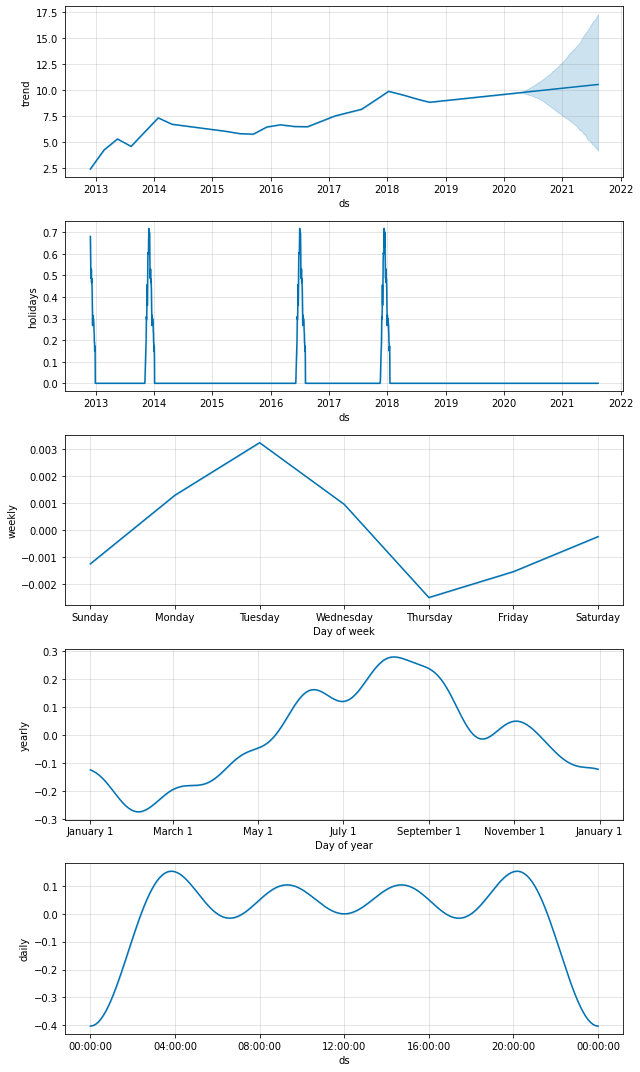

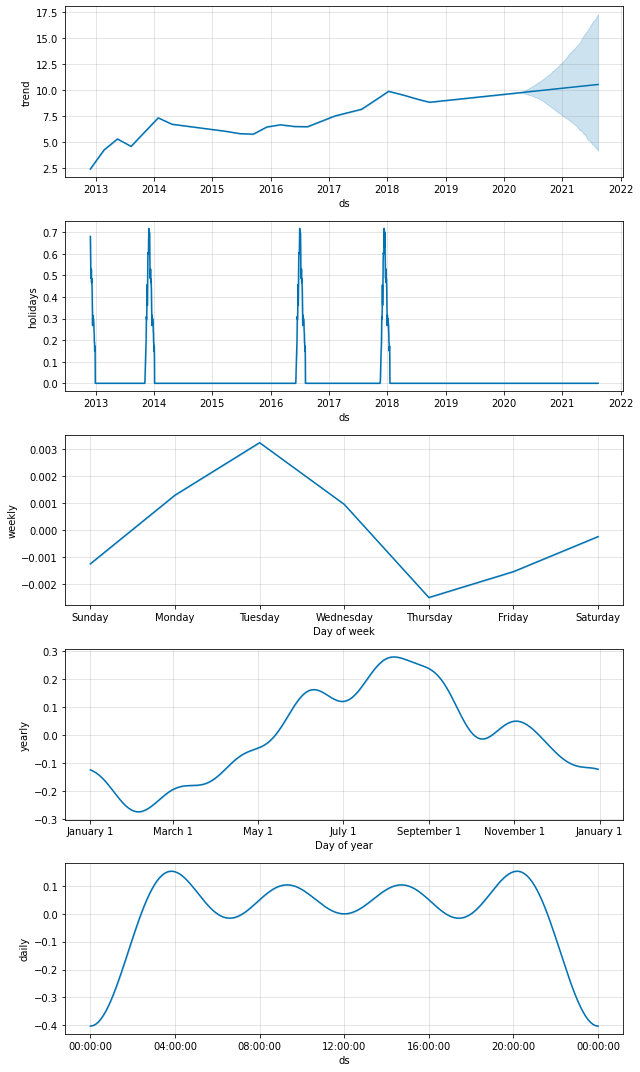

In [52]:
model.plot_components(forecast)

In [53]:
metric_df = forecast.set_index('ds')[['yhat']].join(bitcoin_prophet.set_index('ds').y).reset_index()

In [54]:
metric_df.tail()

,ds,yhat,y
3176,2021-08-09,10.400550,NaN
3177,2021-08-10,10.403214,NaN
3178,2021-08-11,10.401408,NaN
3179,2021-08-12,10.398229,NaN
3180,2021-08-13,10.399286,NaN


In [55]:
metric_df.dropna(inplace = True)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("R-squared: ", r2_score(metric_df.y, metric_df.yhat))
print("Mean Squared Error: ", mean_squared_error(metric_df.y, metric_df.yhat))
print("RMSE: ", np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat)))

R-squared:  0.9925956859713284
Mean Squared Error:  0.021345770863972657
RMSE:  0.1461019194397276


In [57]:
model_no_holiday=Prophet(daily_seasonality=True)
model_no_holiday.fit(bitcoin_prophet)

In [58]:
future_no_holiday = model_no_holiday.make_future_dataframe(periods=525, freq = 'd')
future_no_holiday.tail()

,ds
3176,2021-08-09
3177,2021-08-10
3178,2021-08-11
3179,2021-08-12
3180,2021-08-13


In [59]:
forecast_no_holiday = model_no_holiday.predict(future)

In [60]:
forecast.set_index('ds', inplace=True)
forecast_no_holiday.set_index('ds', inplace=True)
compared_df = forecast.join(forecast_no_holiday, rsuffix="_no_holiday")

In [61]:
compared_df['diff_per'] = 100 * (compared_df['yhat'] - compared_df['yhat_no_holiday']) / compared_df['yhat_no_holiday']
print("difference: ", round(compared_df.diff_per.mean(), 2), "%")

difference:  0.01 %


As we can see above, there was very little difference when we factored in our holidays. 